In [1]:
# VGG16 사전 학습 모델 로드

from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=True) # Top 부분이 포함
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# include_top = True와 비교
model1 = VGG16(weights='imagenet', include_top=False)
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [3]:
# 이미지 포맷팅을 위한 라이브러리
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
# from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [9]:
img = Image.open('data/imgs/data_mw/woman/w_57.jpg')
img.size

(2500, 1667)

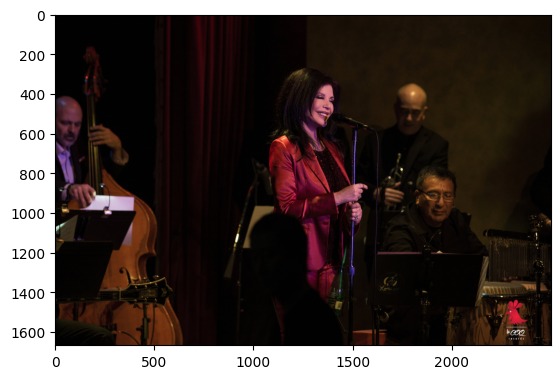

In [10]:
plt.imshow(np.asarray(img))

모델 input에 맞추기 위한 이미지 변환 단계<br>
1. 정사각형으로 변환 Cropping, Warping, Padding <br>
2. 이미지 축소/확대 (resize) – 모델 input에 formatting<br>
3. Image data를 array로 변환<br>
4. 배치 차원 추가(4D array 형태로 차원 확장) <br>


1. 정사각형 변환 Image (center) cropping

2500 1667 416 0 1667


(1667, 1667)

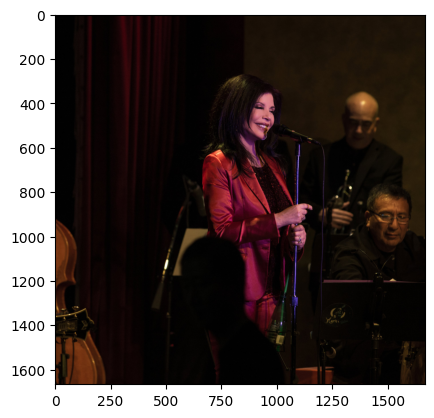

In [11]:
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img = img.crop((x, y, x+s, y+s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
plt.imshow(np.asarray(img))
img.size

2. 이미지 축소/확대 (resize)

In [12]:
# VGG16 모델의  입력 크기 확인
model.layers[0].input_shape # 224x224 칼라이미지

[(None, 224, 224, 3)]

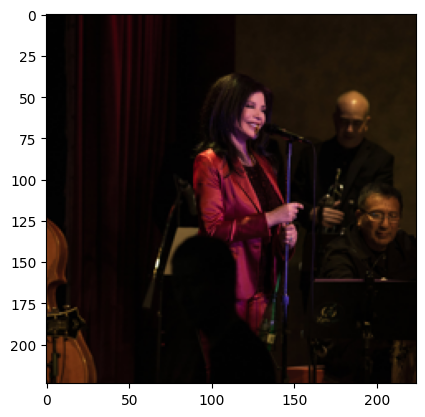

In [13]:
target_size = 224
img = img.resize((target_size, target_size)) # resize to 224x224
plt.imshow(np.asarray(img))

 3. Image data를 array로 변환 - CNN 모델의 입력 형태 =  array

In [14]:
# image 모듈의 img_to_array() 변환 함수 사용
np_img = image.img_to_array(img)
np_img.shape

(224, 224, 3)

4. 배치 차원 추가(4D array 형태로 차원 확장)

In [15]:
img_batch = np.expand_dims(np_img, axis=0)
img_batch.shape

(1, 224, 224, 3)

In [16]:
img_batch

array([[[[  1.,   1.,   1.],
         [  2.,   2.,   2.],
         [  1.,   1.,   1.],
         ...,
         [ 29.,  19.,   9.],
         [ 30.,  19.,   9.],
         [ 29.,  19.,   9.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [ 29.,  19.,   9.],
         [ 29.,  19.,   9.],
         [ 28.,  18.,   8.]],

        [[  1.,   1.,   1.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [ 29.,  19.,   9.],
         [ 28.,  18.,   8.],
         [ 28.,  18.,   8.]],

        ...,

        [[ 98.,  43.,  15.],
         [100.,  43.,  14.],
         [ 35.,  15.,   7.],
         ...,
         [ 16.,   6.,   4.],
         [ 31.,  16.,   8.],
         [ 41.,  23.,  11.]],

        [[ 55.,  26.,  10.],
         [ 94.,  40.,  14.],
         [ 33.,  13.,   6.],
         ...,
         [ 18.,   8.,   5.],
         [ 30.,  16.,   8.],
         [ 38.,  21.,   9.]],

        [[ 42.,  20.,   8.],
       

In [17]:
# 기타 이미지 전처리 (픽셀 값 스케일링(normalization) 등 ...)
pre_processed = preprocess_input(img_batch)


In [18]:
pre_processed

array([[[[-102.939, -115.779, -122.68 ],
         [-101.939, -114.779, -121.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [ -94.939,  -97.779,  -94.68 ],
         [ -94.939,  -97.779,  -93.68 ],
         [ -94.939,  -97.779,  -94.68 ]],

        [[-101.939, -114.779, -121.68 ],
         [-101.939, -114.779, -121.68 ],
         [-101.939, -114.779, -121.68 ],
         ...,
         [ -94.939,  -97.779,  -94.68 ],
         [ -94.939,  -97.779,  -94.68 ],
         [ -95.939,  -98.779,  -95.68 ]],

        [[-102.939, -115.779, -122.68 ],
         [-101.939, -114.779, -121.68 ],
         [-101.939, -114.779, -121.68 ],
         ...,
         [ -94.939,  -97.779,  -94.68 ],
         [ -95.939,  -98.779,  -95.68 ],
         [ -95.939,  -98.779,  -95.68 ]],

        ...,

        [[ -88.939,  -73.779,  -25.68 ],
         [ -89.939,  -73.779,  -23.68 ],
         [ -96.939, -101.779,  -88.68 ],
         ...,
         [ -99.939, -110.779, -107.68 ],
         [ -95.939, -1

예측

In [19]:
y_preds = model.predict(pre_processed) # 별도의 학습 없이 바로 예측 수행 <- 기 학습된 가중치 사용

1/1 [==============================] - 3s 3s/step


In [20]:
y_preds.shape  # 클래스 수(정답 수)

(1, 1000)

In [21]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
y_preds # 각 클래스 별 확률 (이미지가 클래스에 속할 확률)

array([[0.0000000397, 0.0000003146, 0.0000005406, 0.0000002057,
        0.0000001725, 0.00000029  , 0.0000002857, 0.0000008534,
        0.0000001233, 0.0000000521, 0.00000006  , 0.0000000646,
        0.0000001337, 0.0000000787, 0.0000000693, 0.0000002357,
        0.0000001641, 0.0000000502, 0.0000001311, 0.0000000764,
        0.0000000394, 0.0000000283, 0.0000002473, 0.0000002985,
        0.0000000193, 0.0000000996, 0.0000000212, 0.0000000803,
        0.0000004739, 0.000000072 , 0.0000000324, 0.0000000664,
        0.0000000402, 0.0000001323, 0.0000005459, 0.0000000282,
        0.0000000251, 0.0000000544, 0.0000000204, 0.0000000751,
        0.0000000209, 0.0000000422, 0.0000000273, 0.0000000916,
        0.0000000316, 0.0000002696, 0.0000000604, 0.0000000174,
        0.0000000385, 0.0000000469, 0.0000001243, 0.0000043785,
        0.0000000614, 0.0000000617, 0.0000002774, 0.0000001258,
        0.0000003142, 0.0000000459, 0.0000000162, 0.0000001485,
        0.000002948 , 0.0000008442, 0.00

In [22]:
np.max(y_preds)

0.7093196

In [23]:
# 확률이 높은 상위 5개의 클래스 정보 출력
decode_predictions(y_preds, top=5)

35363/35363 [==============================] - 0s 0us/step


[[('n02992211', 'cello', 0.7093196),
  ('n02804610', 'bassoon', 0.033708423),
  ('n04296562', 'stage', 0.028691413),
  ('n04536866', 'violin', 0.02560333),
  ('n04141076', 'sax', 0.022451889)]]

물고기 이미지 분류

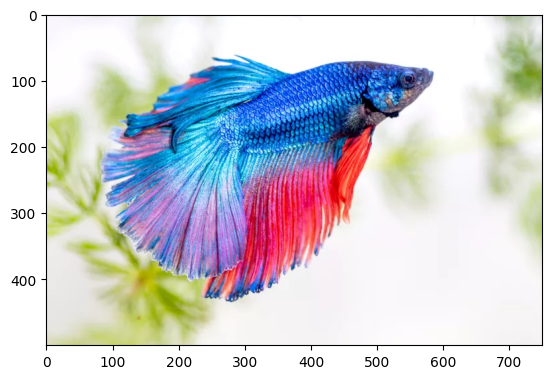

In [26]:
img_fish = Image.open('data/fish.png')
plt.imshow(np.asarray(img_fish))

750 500 125 0 500


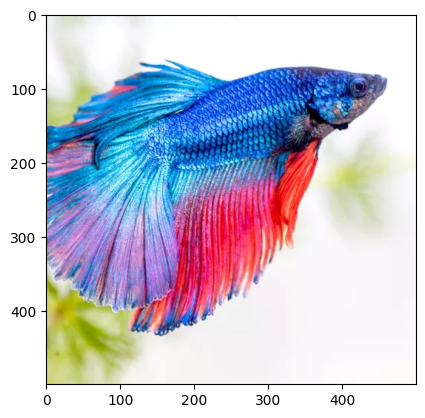

In [27]:
w, h = img_fish.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img_fish = img_fish.crop((x, y, x+s, y+s))
plt.imshow(np.asarray(img_fish))

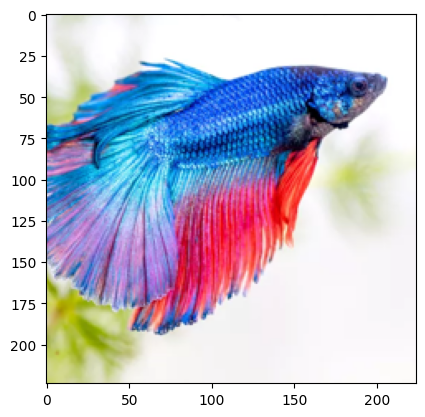

In [28]:
target_size = 224
img_fish = img_fish.resize((target_size, target_size))
plt.imshow(np.asarray(img_fish))

In [29]:
np_img = image.img_to_array(img_fish)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
fish_y_preds = model.predict(pre_processed)

1/1 [==============================] - 0s 18ms/step


In [30]:
decode_predictions(fish_y_preds, top=5)

[[('n01820546', 'lorikeet', 0.46447402),
  ('n01818515', 'macaw', 0.16601625),
  ('n01687978', 'agama', 0.1484619),
  ('n01537544', 'indigo_bunting', 0.10703063),
  ('n01833805', 'hummingbird', 0.027311023)]]

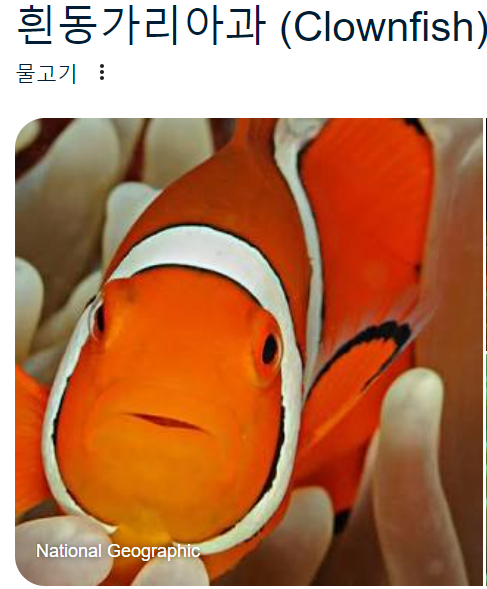